In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_CAN = df[(df['job_country']=='Canada') & (df['job_title_short']=='Data Analyst')]
df_DA_CAN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
118,Data Analyst,"Actuarial and Advanced Analytics, New Grad Rot...",Canada,via BeBee Canada,Full-time,False,Canada,2023-10-31 13:37:11,False,False,Canada,None,NaN,NaN,Definity Financial Corporation,"[python, r, sql, go, bigquery]","{'cloud': ['bigquery'], 'programming': ['pytho..."
225,Data Analyst,"Statistical Healthcare Data Analyst, Policy Re...",Anywhere,via LinkedIn,Full-time,True,Canada,2023-07-07 13:12:09,False,False,Canada,None,NaN,NaN,Policy Reporter,[r],{'programming': ['r']}
638,Data Analyst,Cognitive Data Analyst,Anywhere,via Indeed,Full-time,True,Canada,2023-05-10 13:19:23,False,False,Canada,None,NaN,NaN,Wysdom.AI,"[python, sql]","{'programming': ['python', 'sql']}"
867,Data Analyst,Lead Data Analyst [Remote],Anywhere,via LinkedIn,Full-time,True,Canada,2023-01-23 13:14:40,False,False,Canada,None,NaN,NaN,Talentify.io,"[sql, python, aws, redshift]","{'cloud': ['aws', 'redshift'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782276,Data Analyst,Data and Analytics Architect,Canada,via BeBee Canada,Full-time,False,Canada,2023-08-29 06:35:05,False,False,Canada,None,NaN,NaN,Travelers Canada,"[aws, gcp, azure]","{'cloud': ['aws', 'gcp', 'azure']}"
782746,Data Analyst,Building Science Engineer,"Halifax, NS, Canada",via BeBee Canada,Full-time,False,Canada,2023-01-15 06:16:26,False,False,Canada,None,NaN,NaN,The Engineering Institute of Canada,"[c, windows]","{'os': ['windows'], 'programming': ['c']}"
783072,Data Analyst,Financial Database Analyst Finance,Canada,via BeBee Canada,Full-time,False,Canada,2023-12-04 06:05:45,False,False,Canada,None,NaN,NaN,Scholar Idea,[spreadsheet],{'analyst_tools': ['spreadsheet']}
783652,Data Analyst,Industry Data Analyst Consultant,Canada,via BeBee Canada,Full-time,False,Canada,2023-07-03 06:31:19,False,False,Canada,None,NaN,NaN,IBM,[ibm cloud],{'cloud': ['ibm cloud']}


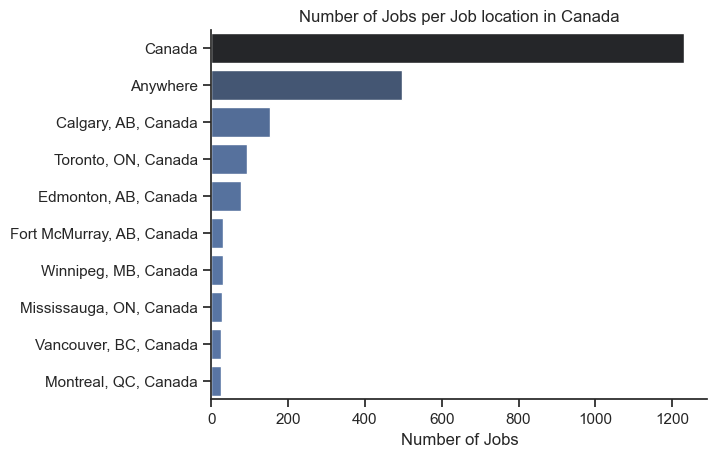

In [9]:
df_plot = df_DA_CAN['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job location in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

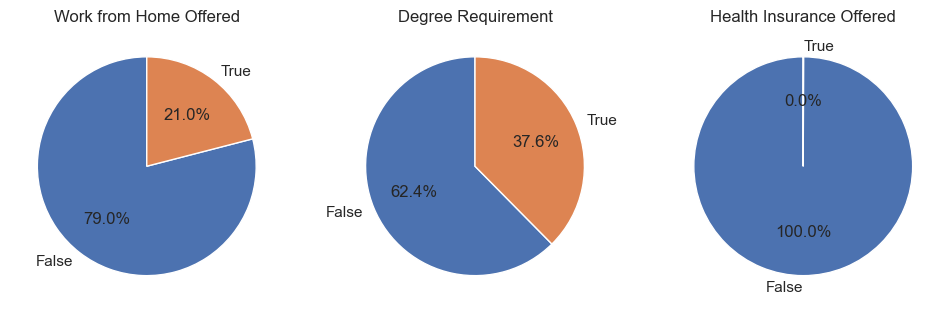

In [10]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (colmun, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_CAN[colmun].value_counts(), labels=['False', 'True'], autopct = '%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

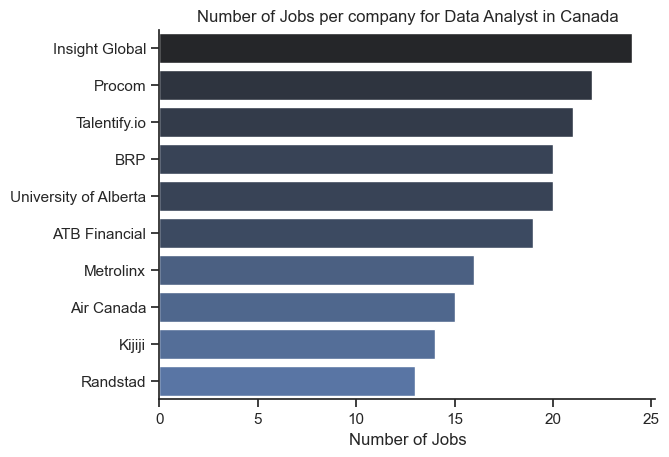

In [19]:
df_plot = df_DA_CAN['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per company for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()